<a href="https://colab.research.google.com/github/Gab2697/Human-Activity-Recognition/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code description: 

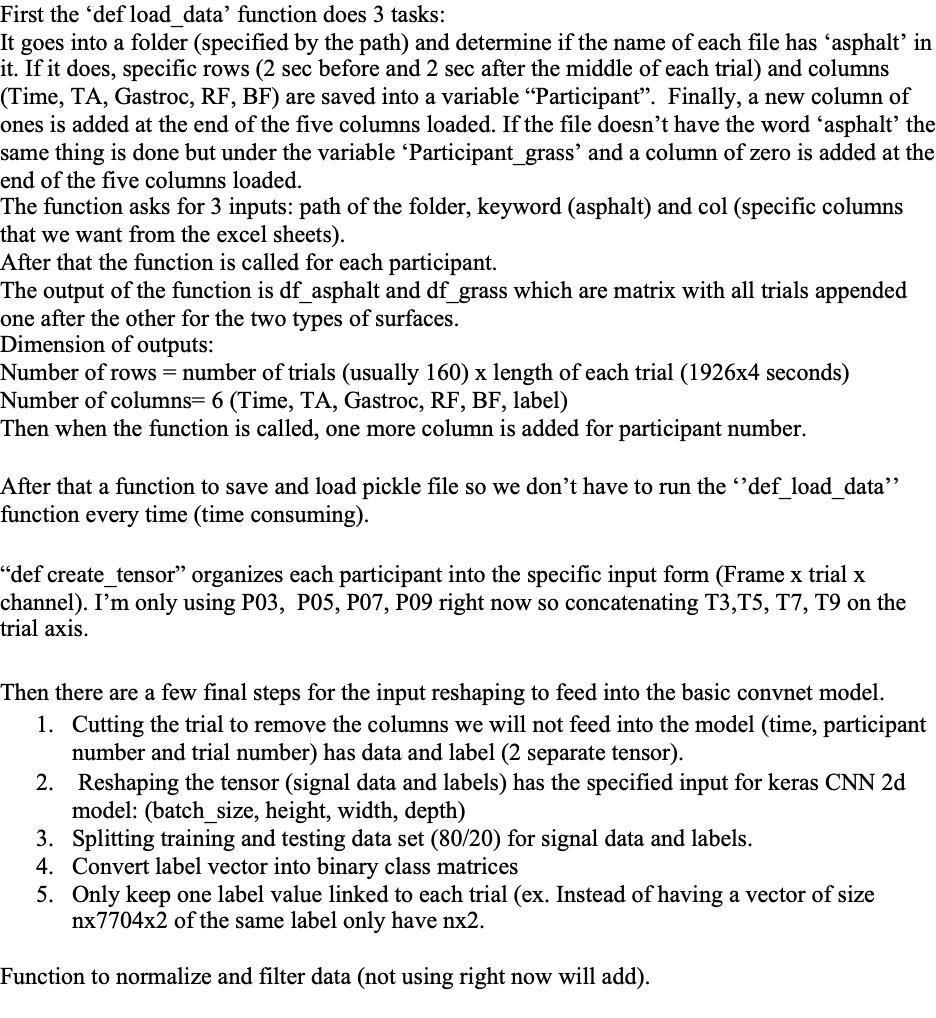

In [1]:
#import
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare the data

Function to load data, organize it by surface and add a specifique label depending on the name of the excel file

In [6]:
def load_data(path,keyword,col):

  Window=1926*2 
  df_asphalt = pd.DataFrame()
  df_grass = pd.DataFrame()
  for fname in os.listdir(path):
    if keyword in fname: 
      os.chdir(path)
      pd_xl_file = pd.ExcelFile(fname)
      df = pd_xl_file.parse("Sheet1") 
      dimensions = df.shape
      Middle=int(dimensions[0]/2)
      Participant=pd.read_excel(fname,sheet_name='Sheet1',  usecols = col)
      Participant['label'] = pd.DataFrame(np.ones(dimensions[0]),dtype=int)
      Participant=Participant.iloc[Middle-Window:Middle+Window]
      df_asphalt = df_asphalt.append(Participant)
      

    else:
      os.chdir(path)
      pd_xl_file_grass = pd.ExcelFile(fname)
      df2 = pd_xl_file_grass.parse("Sheet1") 
      dimensions_grass = df2.shape
      Middle_grass=int(dimensions_grass[0]/2)
      Participant_grass=pd.read_excel(fname,sheet_name='Sheet1', usecols = col)
      Participant_grass['label'] = pd.DataFrame(np.zeros(dimensions_grass[0]),dtype=int)
      Participant_grass=Participant_grass.iloc[Middle_grass-Window:Middle_grass+Window]
      df_grass = df_grass.append(Participant_grass)
      
  return df_asphalt, df_grass

Call load function and add specific columns (participant and trial number)

In [ ]:
#P01
path1= '/content/drive/MyDrive/Gab/P01/exported-1/'
df_asphalt_1, df_grass_1= load_data(path1,'sidewalk',"A,B,J,R,Z")
df_asphalt_1['participant_number']=1#add column for participant number
df_grass_1['participant_number']=1#add column for participant number

#P03
path3= '/content/drive/MyDrive/Gab/P03/exported-emg/'
df_asphalt_3, df_grass_3= load_data(path3,'asphalt',"A,B,D,L,T")
df_asphalt_3['participant_number']=3
df_grass_3['participant_number']=3

#P05
path5= '/content/drive/MyDrive/Gab/P05/exported-emg-5/'
df_asphalt_5, df_grass_5= load_data(path5,'asphalt',"A,B,D,L,T")
df_asphalt_5['participant_number']=5
df_grass_5['participant_number']=5

#P07
path7= '/content/drive/MyDrive/Gab/P07/exported-emg-7/'
df_asphalt_7, df_grass_7= load_data(path7,'asphalt',"A,B,D,L,T")
df_asphalt_7['participant_number']=7
df_grass_7['participant_number']=7

#P09
path9= '/content/drive/MyDrive/Gab/P09/exported-emg-9/'
df_asphalt_9, df_grass_9= load_data(path9,'asphalt',"A,B,D,L,T") 
df_asphalt_9['participant_number']=9
df_grass_9['participant_number']=9


In [ ]:
#only do once
!unzip "/content/drive/MyDrive/Gab/P20/exported.zip" -d "/content/drive/MyDrive/Gab/P20"
!unzip "/content/drive/MyDrive/Gab/P24/exported.zip" -d "/content/drive/MyDrive/Gab/P24"

In [21]:
#P20
path20= '/content/drive/MyDrive/Gab/P20/exported/'
df_asphalt_20, df_grass_20= load_data(path20,'asphalt',"A,B,D,L,T")
df_asphalt_20['participant_number']=20
df_grass_20['participant_number']=20

#P24
path24= '/content/drive/MyDrive/Gab/P24/exported/'
df_asphalt_24, df_grass_24= load_data(path24,'asphalt',"A,B,D,L,T") 
df_asphalt_24['participant_number']=24
df_grass_24['participant_number']=24

Functions to save and open pickle files

In [22]:
#only do once
def save_pickle(path_pickle,T):
  f = open(path_pickle, 'wb')
  pickle.dump(T, f)
  f.close()

  return f 

In [ ]:
#save
f7_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle',df_grass_7)
f7_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle',df_asphalt_7)
f9_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle',df_grass_9)
f9_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle',df_asphalt_9)

In [23]:
f20_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_g.pickle',df_grass_20)
f20_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_a.pickle',df_asphalt_20)
f24_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_g.pickle',df_grass_24)
f24_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_a.pickle',df_asphalt_24)

In [3]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  T = pickle.load(f)
  f.close()

  return T

In [4]:
#load
df_grass_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_g.pickle')
df_asphalt_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_a.pickle')
df_grass_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_g.pickle')
df_asphalt_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_a.pickle')
df_grass_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle')
df_asphalt_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle')
df_grass_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle')
df_asphalt_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle')

df_grass_20= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_g.pickle')
df_asphalt_20= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_a.pickle')
df_grass_24= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_g.pickle')
df_asphalt_24= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_a.pickle')

Data visualization

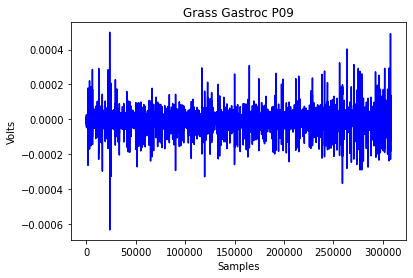

In [64]:
#visualization of data grass
df_grass=df_grass_9
len_grass= list(range(0,len(df_grass.iloc[0:308160,0])))
plt.plot(len_grass,df_grass.iloc[0:308160,3],'b') 
# plt.ylim((-0.006,0.006))
plt.title('Grass Gastroc P09') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

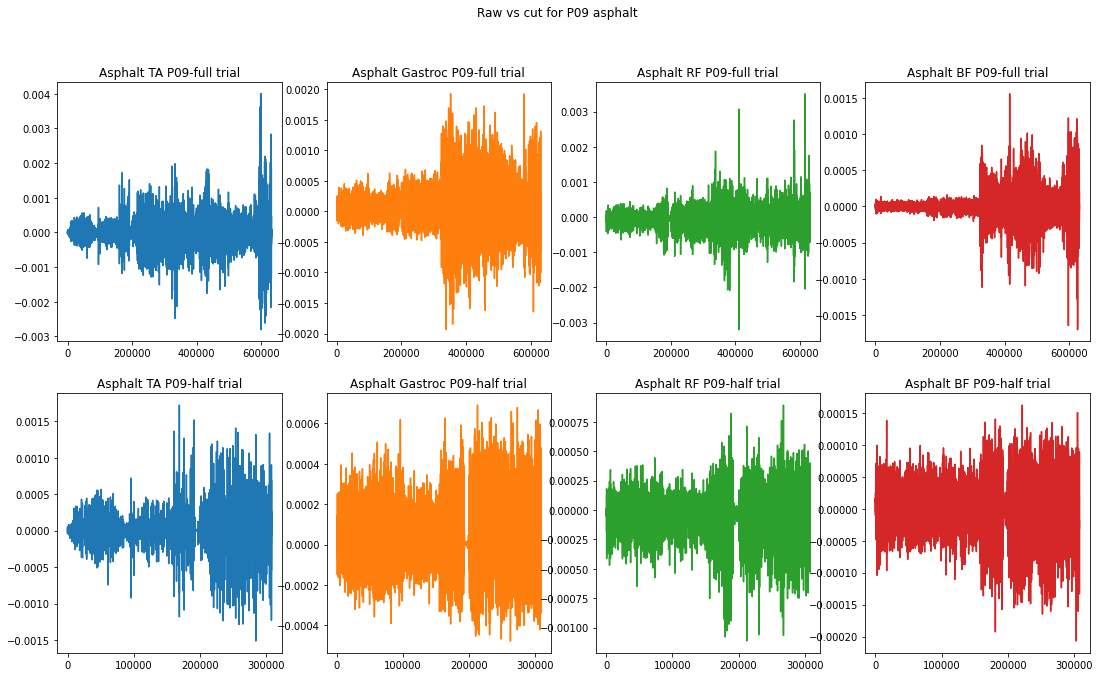

In [46]:
import matplotlib.pyplot as plt
df_asphalt=df_asphalt_20
fig, ((ax1, ax2, ax3, ax4), (ax1_cut, ax2_cut, ax3_cut, ax4_cut)) = plt.subplots(2, 4)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Raw vs cut for P09 asphalt')

ax1.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,1])
ax1.title.set_text('Asphalt TA P09-full trial') 
ax1.locator_params(axis='x', nbins=4) 
ax2.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,2], 'tab:orange')
ax2.title.set_text('Asphalt Gastroc P09-full trial') 
ax2.locator_params(axis='x', nbins=4) 
ax3.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,3], 'tab:green')
ax3.title.set_text('Asphalt RF P09-full trial') 
ax3.locator_params(axis='x', nbins=4) 
ax4.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,4], 'tab:red')
ax4.title.set_text('Asphalt BF P09-full trial') 
ax4.locator_params(axis='x', nbins=4) 

ax1_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,1])
ax1_cut.title.set_text('Asphalt TA P09-half trial')
ax1_cut.locator_params(axis='x', nbins=4) 
ax2_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,2], 'tab:orange')
ax2_cut.title.set_text('Asphalt Gastroc P09-half trial')
ax2_cut.locator_params(axis='x', nbins=4) 
ax3_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,3], 'tab:green')
ax3_cut.title.set_text('Asphalt RF P09-half trial')
ax3_cut.locator_params(axis='x', nbins=4) 
ax4_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,4], 'tab:red')
ax4_cut.title.set_text('Asphalt BF P09-half trial') 
ax4_cut.locator_params(axis='x', nbins=4) 


Filtering EMG signals with banpass

In [6]:
def filteremg(emg, Fs=1926, high_band=20, low_band=500):
    #variables
    time=emg.iloc[:,0]
    TA=emg.iloc[:,1]
    Gastroc=emg.iloc[:,2]
    RF=emg.iloc[:,3]
    BF=emg.iloc[:,4]
  
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(Fs/2)
    low_band = low_band/(Fs/2)
    
    # create bandpass filter for EMG
    b1, a1 = signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filt_TA = signal.filtfilt(b1, a1, TA)
    emg_filt_Gastroc= signal.filtfilt(b1, a1, Gastroc) 
    emg_filt_RF = signal.filtfilt(b1, a1, RF) 
    emg_filt_BF = signal.filtfilt(b1, a1, BF)

    #label and participant number
    label=np.transpose([emg.iloc[:,5]])
    Part_number=np.transpose([emg.iloc[:,6]])    

    return emg_filt_TA,emg_filt_Gastroc,emg_filt_RF,emg_filt_BF,label,Part_number

In [7]:
#call function filtering
df_grass_3_filt=filteremg(emg=df_grass_3, Fs=1926, high_band=20, low_band=500)
df_asphalt_3_filt=filteremg(emg=df_asphalt_3, Fs=1926, high_band=20, low_band=500)

df_grass_5_filt=filteremg(emg=df_grass_5, Fs=1926, high_band=20, low_band=500)
df_asphalt_5_filt=filteremg(emg=df_asphalt_5, Fs=1926, high_band=20, low_band=500)

df_grass_7_filt=filteremg(emg=df_grass_7, Fs=1926, high_band=20, low_band=500)
df_asphalt_7_filt=filteremg(emg=df_asphalt_7, Fs=1926, high_band=20, low_band=500)

df_grass_9_filt=filteremg(emg=df_grass_9, Fs=1926, high_band=20, low_band=500)
df_asphalt_9_filt=filteremg(emg=df_asphalt_9, Fs=1926, high_band=20, low_band=500)

df_grass_20_filt=filteremg(emg=df_grass_20, Fs=1926, high_band=20, low_band=500)
df_asphalt_20_filt=filteremg(emg=df_asphalt_20, Fs=1926, high_band=20, low_band=500)

df_grass_24_filt=filteremg(emg=df_grass_24, Fs=1926, high_band=20, low_band=500)
df_asphalt_24_filt=filteremg(emg=df_asphalt_24, Fs=1926, high_band=20, low_band=500)

In [30]:
df_asphalt_24_filt[4]

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

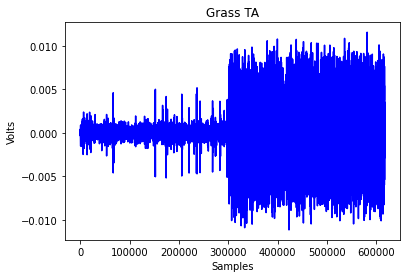

In [31]:
#visualization of data filtered 
df_grass=df_grass_24_filt[3]
len_grass= list(range(0,len(df_grass)))
plt.plot(len_grass,df_grass,'b') 
plt.title('Grass TA') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

Normalize data to be betwen 0 and 1

In [31]:
import numpy as np
def normalize(x):
  #Normalized Data
  TA_norm = (x[0]-min(x[0]))/(max(x[0])-min(x[0]))
  Gastroc_norm = (x[1]-min(x[1]))/(max(x[1])-min(x[1]))
  RF_norm = (x[2]-min(x[2]))/(max(x[2])-min(x[2]))
  BF_norm = (x[3]-min(x[3]))/(max(x[3])-min(x[3]))
  
  #label and participant number
  label=x[4]
  Part_number=x[5]
  return TA_norm,Gastroc_norm,RF_norm,BF_norm,label,Part_number

In [32]:
#call filtering function
df_grass_3_norm=normalize(df_grass_3_filt)
df_asphalt_3_norm=normalize(df_asphalt_3_filt)
df_grass_5_norm=normalize(df_grass_5_filt)
df_asphalt_5_norm=normalize(df_asphalt_5_filt)
df_grass_7_norm=normalize(df_grass_7_filt)
df_asphalt_7_norm=normalize(df_asphalt_7_filt)
df_grass_9_norm=normalize(df_grass_9_filt)
df_asphalt_9_norm=normalize(df_asphalt_9_filt)

df_grass_20_norm=normalize(df_grass_20_filt)
df_asphalt_20_norm=normalize(df_asphalt_20_filt)
df_grass_24_norm=normalize(df_grass_24_filt)
df_asphalt_24_norm=normalize(df_asphalt_24_filt)

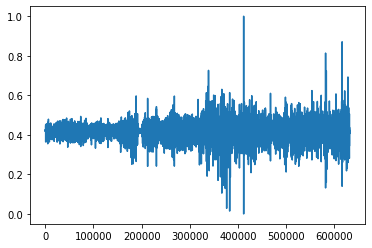

In [38]:
plt.plot(df_asphalt_20_norm[2])
plt.show()

In [ ]:
df_grass_3_norm=(pd.DataFrame(df_grass_3_norm)).T
df_asphalt_3_norm=(pd.DataFrame(df_asphalt_3_norm)).T
df_grass_5_norm=(pd.DataFrame(df_grass_5_norm)).T
df_asphalt_5_norm=(pd.DataFrame(df_asphalt_5_norm)).T
df_grass_7_norm=(pd.DataFrame(df_grass_7_norm)).T
df_asphalt_7_norm=(pd.DataFrame(df_asphalt_7_norm)).T
df_grass_9_norm=(pd.DataFrame(df_grass_9_norm)).T
df_asphalt_9_norm=(pd.DataFrame(df_asphalt_9_norm)).T

df_grass_20_norm=(pd.DataFrame(df_grass_20_norm)).T
df_asphalt_20_norm=(pd.DataFrame(df_asphalt_20_norm)).T
df_grass_24_norm=(pd.DataFrame(df_grass_24_norm)).T
df_asphalt_24_norm=(pd.DataFrame(df_asphalt_24_norm)).T

Creating a tensor with specific shape (frame x trial x channel)

In [69]:
def create_tensor(df_a,df_g):
  #convert from tuple to tensor
  df_a  = torch.stack(list(df_a), dim=0)
  #tensor asphalt
  trials_a=len(df_a)/(1926*4) # how many trials-80
  T_asphalt=np.stack(np.split(df_a.values, trials_a), axis=1)
  #tensor grass
  trials_g=len(df_g)/(1926*4) # how many trials
  T_grass=np.stack(np.split(df_g.values, trials_g), axis=1)
  #tensor both conditions
  a=tf.constant(T_asphalt)
  g=tf.constant(T_grass)
  T = tf.concat([a, g], axis=1)

  return T

In [70]:
# T1=create_tensor(df_asphalt_1,df_grass_1)
# print("T1 shape:", T1.shape)

T3=create_tensor(df_asphalt_3_norm,df_grass_3_norm)
print("T3 shape:", T3.shape)

# T5=create_tensor(df_asphalt_5_norm,df_grass_5_norm)
# print("T5 shape:", T5.shape)

# T7=create_tensor(df_asphalt_7_norm,df_grass_7_norm)
# print("T7 shape:", T7.shape)

# T9=create_tensor(df_asphalt_9_norm,df_grass_9_norm)
# print("T9 shape:", T9.shape)

# T20=create_tensor(df_asphalt_20_norm,df_grass_20_norm)
# print("20 shape:", T20.shape)

# T24=create_tensor(df_asphalt_24_norm,df_grass_24_norm)
# print("T9 shape:", T24.shape)

# TT = tf.concat([T3,T5,T7,T9,T20,T24], axis=1)
# print("Tensor_all shape:", TT.shape)

TypeError: ignored

Final input data and label reshaping

In [32]:
from tensorflow.keras.utils import to_categorical

#========Initial cutting========
#X-data with shape ((1926frames x 4sec)x(80trials x 2surfaces x n-participants) x 4channels)
X=TT[:, :, 1:5].numpy() #size: (7704, 320, 4)
#Y-categorical encoded label = 1 for asphalt and 0 for grass 
y=TT[:,:,5].numpy() 
#number trials
num_trials= TT.shape[1]

#========Sreshaping into the specific intut format========S 
#keras CNN is looking for X= (batch_size, height, width,depth)
X_reshape = X.reshape((num_trials,7704, 4, 1))
y=y.reshape((num_trials,7704,1))
print("Data shape:", X_reshape.shape) 
print("Label shape:", y.shape)

#========Splitting the data into training and testing sets========S
#data set for training and testing the model
train_size= int(0.8*num_trials) 
X_train= X_reshape[0:train_size,:,:,:]
X_test=X_reshape[train_size:num_trials,:,:,:]
#labels for train and test
y_train=y[0:train_size,:,:] 
y_test=y[train_size:num_trials,:,:]

# ========convert class vectors to binary class matrices========
label_train = to_categorical(y_train, 2)
label_test = to_categorical(y_test, 2)

#========only keeping one label for each trials========
#(instead of a complete vector of the same number)
label_train= label_train[:,0,:]
label_test=label_test[:,0,:]

print("Data shape train:",X_train.shape,"Data shape test:",X_test.shape,"Label shape train:",label_train.shape,"Label shape test:",label_test.shape)

Data shape: (641, 7704, 4, 1)
Label shape: (641, 7704, 1)
Data shape train: (512, 7704, 4, 1) Data shape test: (129, 7704, 4, 1) Label shape train: (512, 2) Label shape test: (129, 2)


#Basic Convnet

In [33]:
from keras import layers 
from keras import models

#Instantiating a small convnet
model = models.Sequential()
#filter size: 32, kenel of 3x3, input shape without the batch_size (one trial), padding= with zero padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(7704,4,1),padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7704, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3852, 2, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3852, 2, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1926, 1, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1926, 1, 64)       18496     
                                                                 
Total params: 28,064
Trainable params: 28,064
Non-traina

In [34]:
#Adding a classifier on top of the convnet
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(2, activation='sigmoid')) #last layer has 2 output options
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7704, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3852, 2, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3852, 2, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1926, 1, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1926, 1, 64)       18496     
                                                                 
 flatten (Flatten)           (None, 123264)            0

In [35]:
# testing CNN model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history= model.fit(X_train, label_train, epochs=5, batch_size=num_trials) 

Epoch 1/5
1/1 [==============================] - 25s 25s/step - loss: 0.6931 - accuracy: 0.4922
Epoch 2/5
1/1 [==============================] - 18s 18s/step - loss: 0.6940 - accuracy: 0.5039
Epoch 3/5
1/1 [==============================] - 18s 18s/step - loss: 0.6989 - accuracy: 0.4961
Epoch 4/5
1/1 [==============================] - 18s 18s/step - loss: 0.6933 - accuracy: 0.4961
Epoch 5/5
1/1 [==============================] - 18s 18s/step - loss: 0.6931 - accuracy: 0.5039


In [37]:
#test accuracy
test_loss, test_acc = model.evaluate(X_test, label_test)
test_acc

5/5 [==============================] - 2s 288ms/step - loss: 0.6933 - accuracy: 0.4884


0.4883720874786377

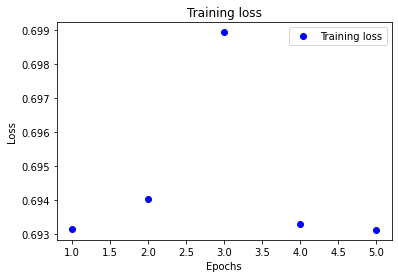

In [38]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #“bo” is for “blue dot.”
plt.title('Training loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

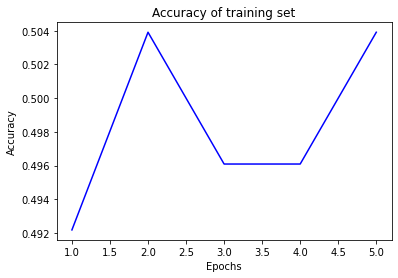

In [39]:
accuracy_values = history_dict['accuracy']
plt.plot(epochs, accuracy_values, 'b', label='Validation loss')#“b” is for “solid blue line.”
plt.title('Accuracy of training set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()